# Aprendizado de Máquina
# Aula 02 - Exercício 01

## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [12]:
import numpy as np
import pandas as pd

salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

n_sala = 1
for sala in salas:
    print("--- Sala: %d ---" % n_sala)
    print("Média: %f" % np.mean(sala))    
    n_sala += 1
n_sala = 0

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


Dessa forma, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2. 

- Demonstre o porquê dessa conclusão estar equivocada.

  - Dica: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

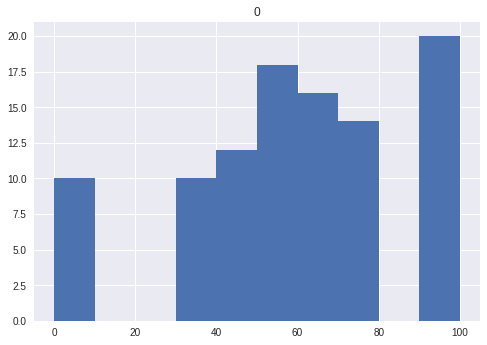

In [13]:
df1 = pd.DataFrame(salas[0])
df2 = pd.DataFrame(salas[1])

h = df1.hist()

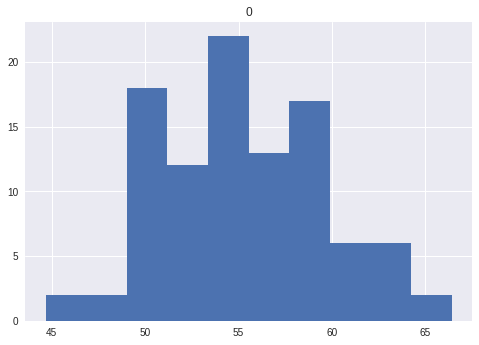

In [14]:
h2 = df2.hist()

### Resposta
Considerando o fato das duas salas possuem a mesma quantidade de alunos, pela distribuição dos dados do segundo histograma nota-se que a maioria dos alunos possuem nota maior ou igual a 50, o que não é o caso do primeiro histograma.



---

Calcule o número de aprovados em cada uma das salas.
- Dica: Use a função `argwhere` da biblioteca **numpy**.

In [15]:
print("Número de reprovados na sala 1: %d" % len(np.argwhere(salas[0] < 50)))
print("Número de reprovados na sala 2: %d" % len(np.argwhere(salas[1] < 50)))

Número de reprovados na sala 1: 32
Número de reprovados na sala 2: 10


## Dados multidimensionais

Considere o conjunto Iris, disponível no arquivo `iris.data`.  Ele contém 150 observações sobre 4 características medidas em 3 tipos de flores. 

O trecho de código abaixo carrega o conjunto, armazena-o na variável `iris` e exibe seu conteúdo.



In [16]:
import pandas as pd
import scipy as sp
import seaborn as sns

iris = pd.read_csv("iris.data", header=None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa




---


- Calcule os quatro momentos (média, variância, obliquidade e achatamento) de cada uma das quatro variáveis do conjunto.

  - Dica:  cada variável pode ser acessada da forma `iris[i]`, onde `i` é uma das 4 variáveis do conjunto (entre 0 e 3). Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy** para obliquidade (skew) e achatamento (kurtosis).

In [17]:
#Momentos

iris = pd.read_csv("iris.data", header=None)

for i in range(0,4):  
  print("--- Dimensão: %d ---" % i)
  print("Média: %f" % np.mean(iris[i]))
  print("Variância: %f" % np.var(iris[i]))
  print("Obliquidade: %f" % sp.stats.skew(iris[i]))
  print("Achatamento: %f" % sp.stats.kurtosis(iris[i]))


--- Dimensão: 0 ---
Média: 5.843333
Variância: 0.681122
Obliquidade: 0.311753
Achatamento: -0.573568
--- Dimensão: 1 ---
Média: 3.054000
Variância: 0.186751
Obliquidade: 0.330703
Achatamento: 0.241443
--- Dimensão: 2 ---
Média: 3.758667
Variância: 3.092425
Obliquidade: -0.271712
Achatamento: -1.395359
--- Dimensão: 3 ---
Média: 1.198667
Variância: 0.578532
Obliquidade: -0.103944
Achatamento: -1.335246




---


- Calcule o histograma e o boxplot de cada uma das quatro variáveis do conjunto. Analise se os dados estão centrados (simetria) e estime qual intervalo contém 50% dos dados (intervalo entre primeiro e terceiro quartil).


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e00b9f978>]],
      dtype=object)

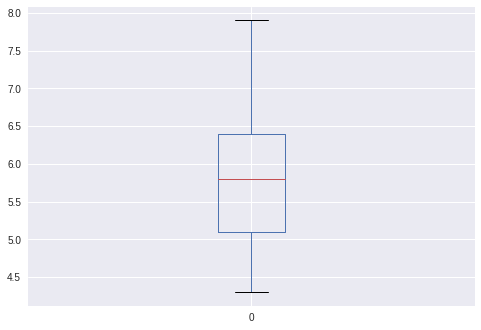

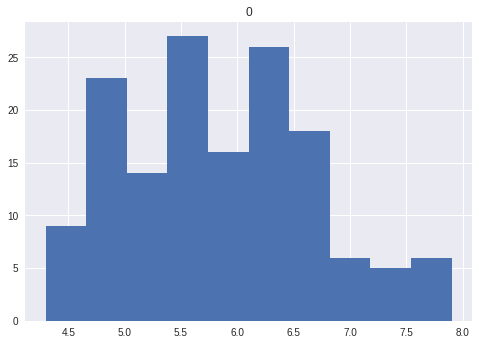

In [18]:
iris.boxplot(0)
iris.hist(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e00ab6a20>]],
      dtype=object)

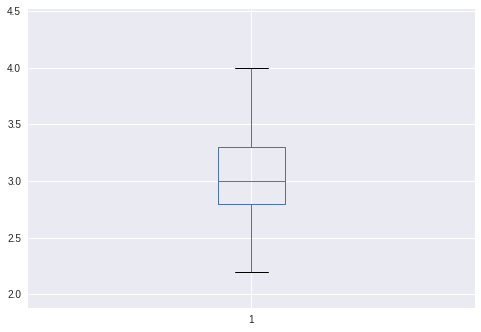

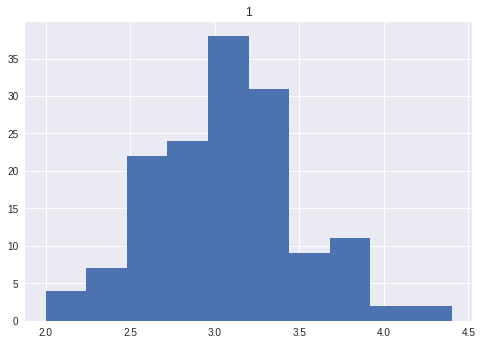

In [19]:
iris.boxplot(1)
iris.hist(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e00aeebe0>]],
      dtype=object)

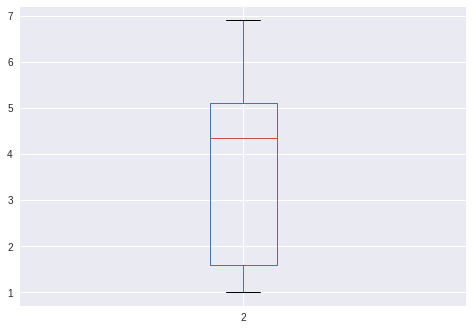

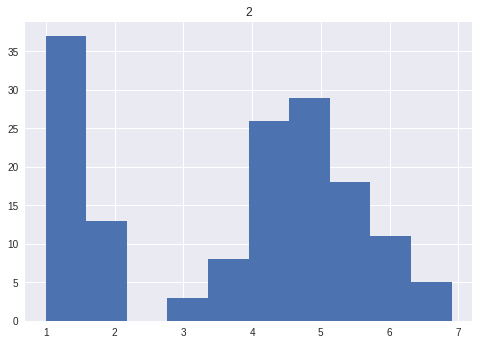

In [20]:
iris.boxplot(2)
iris.hist(2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e00a5e630>]],
      dtype=object)

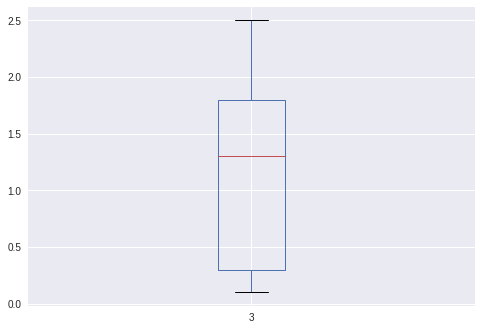

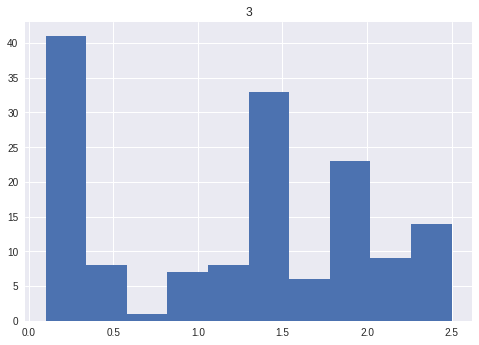

In [21]:
iris.boxplot(3)
iris.hist(3)

### Resposta
Apenas a segunda variável apresenta uma leve simetria em seus dados.
- Quartis Q1 e Q3:
  - 5.1 e 6.4
  - 2.75 e 3.25
  - 1.6 e 5.1
  - 0.4 e 1.6



---


- Calcule o gráfico de dispersão entre todas as variáveis do conjunto para indicar uma possível relação entre as variáveis.
  - Dica: utilize a função `pairplot` da biblioteca **seaborn**

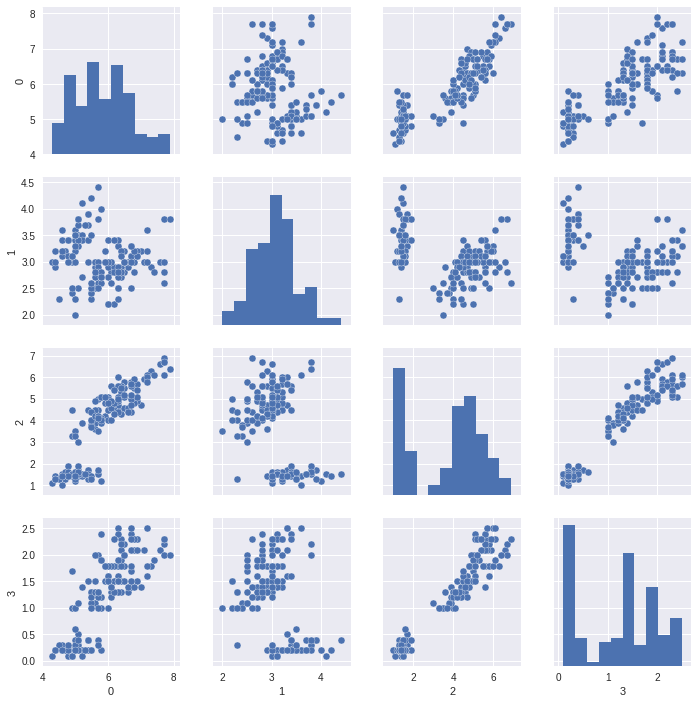

In [22]:
# Create the default pairplot
sns.pairplot(iris)



---

- Para obter um valor numérico sobre a relação entre as variáveis, calcule a matriz de covariância dos dados. Comente quais variáveis estão mais relacionadas e se há alguma relação com o gráfico gerado na questão anterior.
  - Dica: utilize a biblioteca a função `cov` da biblioteca **numpy**, com parâmetro `rowvar=False`.

In [32]:
# Covariancia
m = np.cov(iris.loc[:, 0:3],rowvar=False)
print(m)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


### Resposta

Nota-se que os dois maiores valores de covariância (1.27 e 1.29) são dos pares de variáveis ( 0x2 e 2x3 ) que apresentam uma certa linearidade.



---

A magnitude da covariância não é um valor facilmente interpretável, pois não é um valor normalizado e portanto depende da magnitude das variáveis que foram usadas para seu cálculo. Dessa forma podemos utilizar o Coeficiente de correlação de Pearson para facilitar nossa análise.

- Dessa forma, calcule o coeficiente de correlação de Pearson para as variáveis do conjunto.
  - Dica: utilize a função `corrcoef` da biblioteca **numpy** com parâmetro `rowvar=False`.

In [36]:
#Correlação (Pearson correlation coefficient)
print(np.corrcoef(iris.loc[:,0:3],rowvar=False))

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


### Resposta

Temos uma confirmação da nossa observação acima, onde os dois maiores coeficientes de correlação são dos dois pares que observamos anteriormente